In [210]:
from vocab import vocab
#vocab = {'distance','temporary','romeo','fight','self','comedy', 'abide' ,'love', 'persustence' , 'hate', 'world', 'tragedy', 'fool', 'cry', 'hold', 'good', 'dream', 'joy', 'desire', 'sustain', 'arrogance', 'abuse', 'vile', 'asleep', 'warrior', 'perfect', 'death', 'lord', 'heart', 'juliet', 'cry', 'heaven', 'hell'}
print(len(vocab))

140


In [211]:
from sklearn.model_selection import train_test_split

In [212]:
'love' in vocab

True

In [213]:
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd

In [214]:
nr = 11
nc = len(vocab)
df= pd.DataFrame(data= vocab)
df

,0
0,dream
1,pain
2,believe
3,hate
4,mortal
...,...
135,way
136,asleep
137,still
138,chinese


In [215]:

# Curate data
matrix1 = []
matrix2 = []
matrix3 = []
# X = f.readline()
dtype = 'uint8'
bag = list(vocab)

with open('love-quotes.txt') as openfileobject:
    for line in openfileobject:
        vec = np.zeros(nc, dtype=dtype)
        for word in line.split():
            if word in vocab:
                index = bag.index(word)
                vec[index] = 1
        matrix1.append(vec)
    df2 = pd.DataFrame(data = matrix1)

with open('tragedy-quotes.txt') as openfileobject:
    for line in openfileobject:
        vec = np.zeros(nc, dtype=dtype)
        for word in line.split():
            if word in vocab:
                index = bag.index(word)
                vec[index] = 1
        matrix2.append(vec)
    df3 = pd.DataFrame(data = matrix2)
    # df2.join(pd.DataFrame(data = matrix2))


with open('comedy-quotes.txt') as openfileobject:
    for line in openfileobject:
        vec = np.zeros(nc, dtype=dtype)
        for word in line.split():
            if word in vocab:
                index = bag.index(word)
                vec[index] = 1
        matrix3.append(vec)
    df4 = pd.DataFrame(data = matrix3)


In [216]:

X_train1 = df2.to_numpy(dtype=dtype)
y_train1 = np.zeros(10, dtype=dtype)

X_train1, X_test1, y_train1, y_test1 = train_test_split(X_train1,y_train1,test_size=0.4,random_state=0)

X_train2 = df3.to_numpy(dtype=dtype)
y_train2 = np.ones(10, dtype=dtype)

X_train2, X_test2, y_train2, y_test2 = train_test_split(X_train2,y_train2,test_size=0.4,random_state=0)

X_train3 = df4.to_numpy(dtype=dtype)
y_train3 = np.full((10),2, dtype=dtype)

X_train3, X_test3, y_train3, y_test3 = train_test_split(X_train3,y_train3,test_size=0.4,random_state=0)

In [217]:

x_train_new = np.concatenate((X_train1,X_train2,X_train3),axis = 0)
y_train_new = np.concatenate((y_train1,y_train2,y_train3))

x_test_new = np.concatenate((X_test1,X_test2,X_test3),axis = 0)
y_test_new = np.concatenate((y_test1,y_test2,y_test3))


In [218]:
# K nearest Neighbours 
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors=3)
knn_clf.fit(x_train_new,y_train_new)
knn_score = knn_clf.score(x_test_new,y_test_new)
print("K nearest neighbour accuracy: ", knn_score)

K nearest neighbour accuracy:  0.25


In [219]:
# Logistic regression
from sklearn.linear_model import LogisticRegression
lr_clf = LogisticRegression()
lr_clf.fit(x_train_new, y_train_new)
lr_score = lr_clf.score(x_test_new,y_test_new)
print("Logistic Regression accuracy: ", lr_score)

Logistic Regression accuracy:  0.4166666666666667


In [220]:
from sklearn.tree import DecisionTreeClassifier as decision_tree
clf = decision_tree(random_state=0)
clf.fit(x_test_new,y_test_new)
dt_score = clf.score(x_test_new, y_test_new)
print("Decision Tree accuracy: ", dt_score)

Decision Tree accuracy:  0.9166666666666666


In [221]:
# Support vector machine
from sklearn.svm import SVC
sv_clf = SVC(probability=True,kernel='linear')
sv_clf.fit(x_test_new,y_test_new)
svm_score = sv_clf.score(x_test_new, y_test_new)
print("Support Vector machine accuracy: ",svm_score)

Support Vector machine accuracy:  0.8333333333333334


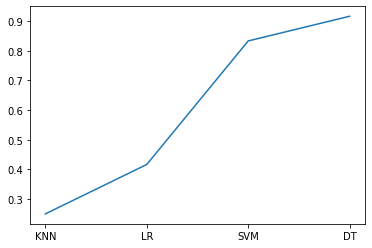

In [223]:
res = [knn_score, lr_score, svm_score, dt_score]
plt.plot(["KNN", "LR", "SVM", "DT"], res )